In [2]:
import pandas as pd

In [3]:
filename= r"..\data\bdm_e_ls_kabel_202307051411.csv"

In [4]:
# get df
df = pd.read_csv(filename, sep=';')

# Define the WKT string
wkt_string = df['ligging_kaart'][0]

# Extract the coordinates from the WKT string
coordinates = []
cleaned_wkt = wkt_string.replace('MULTILINESTRING ((', '').replace('))', '')  # Remove unnecessary characters
line_strings = cleaned_wkt.split(', ')  # Split into individual line strings

for line_string in line_strings:
    points = line_string.split(', ')
    for point in points:
        x, y = map(float, point.split(' '))
        coordinates.append((x, y))

# Create a dictionary with IDs associated with each tuple
coordinates_dict = {i: coord for i, coord in enumerate(coordinates)}


In [5]:
coordinates_dict

{0: (211133.478, 373021.158),
 1: (211144.388, 373000.0),
 2: (211147.59100000001, 372994.48),
 3: (211149.702, 372990.841),
 4: (211152.62900000002, 372985.12200000003),
 5: (211152.89500000002, 372984.641),
 6: (211155.13, 372980.609),
 7: (211158.733, 372974.344),
 8: (211161.578, 372969.396),
 9: (211164.47400000002, 372964.106),
 10: (211174.446, 372945.886),
 11: (211174.487, 372945.824),
 12: (211174.605, 372945.67600000004),
 13: (211174.61000000002, 372945.67),
 14: (211174.74300000002, 372945.55100000004),
 15: (211174.89500000002, 372945.457),
 16: (211174.915, 372945.447),
 17: (211175.09900000002, 372945.376),
 18: (211175.117, 372945.371),
 19: (211175.278, 372945.34),
 20: (211175.29200000002, 372945.338),
 21: (211175.432, 372945.33400000003),
 22: (211175.574, 372945.348),
 23: (211175.71600000001, 372945.37200000003),
 24: (211176.073, 372945.43700000003),
 25: (211181.05000000002, 372946.34),
 26: (211181.342, 372946.36),
 27: (211181.378, 372946.358),
 28: (211181.5

In [7]:
import networkx as nx
import folium
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt


2023-07-05 15:49:06.964 
  command:

    streamlit run c:\git\outlook_tower\wt\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


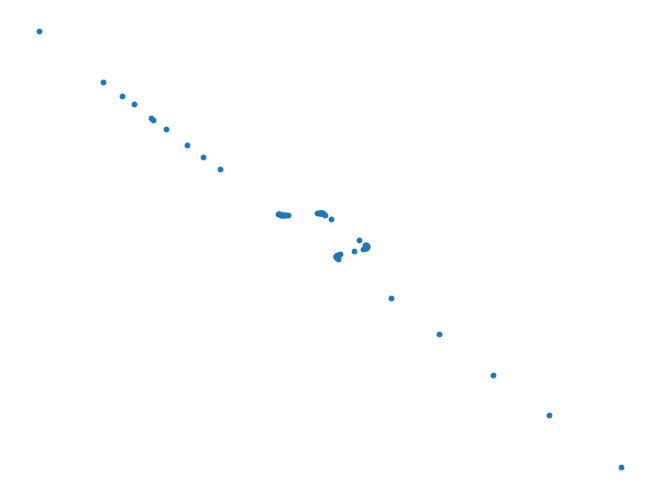

In [8]:

st.title('Graph with OpenStreetMap Background')

# Create an empty NetworkX graph
graph = nx.Graph()

# Add nodes to the graph using the coordinates from the dictionary
for node_id, coordinates in coordinates_dict.items():
    graph.add_node(node_id, pos=coordinates)

# Create a Folium map object
map_osm = folium.Map(location=[coordinates_dict[0][1], coordinates_dict[0][0]], zoom_start=14)

# Add OpenStreetMap tiles as the base layer
folium.TileLayer('openstreetmap').add_to(map_osm)

# Add the nodes as markers on the map
for node_id, coordinates in coordinates_dict.items():
    folium.Marker(location=[coordinates[1], coordinates[0]], popup=str(node_id)).add_to(map_osm)

# Display the map using the folium_static function
folium_static(map_osm)

# Plot the graph
nx.draw(graph, pos=nx.get_node_attributes(graph, 'pos'), with_labels=False, node_size=10)

# Display the graph using Matplotlib
plt.show()
